# Optimize some loss function with tensorflow
##### credits to: https://github.com/ilguyi/

In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import time

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import cm
from matplotlib import animation, rc
from IPython.display import HTML

from itertools import zip_longest

import tensorflow as tf
tf.enable_eager_execution()

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

### Define the loss function

In [4]:
def f(x, y):
  return (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

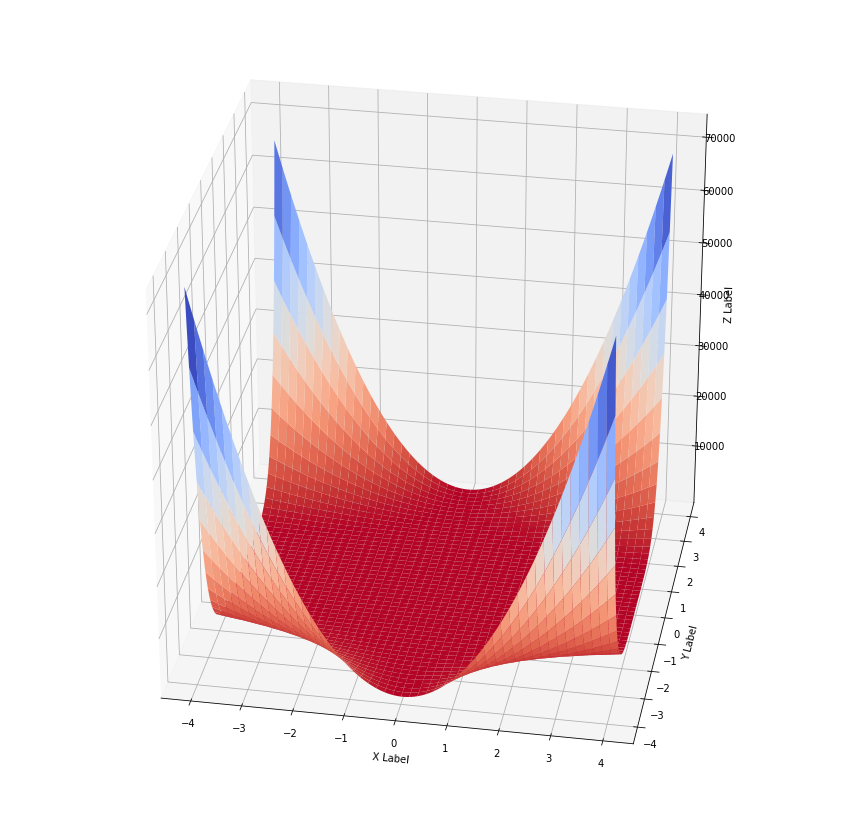

In [5]:
x1=np.linspace(-4,4,1000)
x2=np.linspace(-4,4,1000)

z=f(x1,x2)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(x1, x2)
zs = np.array(f(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z, cmap=cm.coolwarm_r)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(azim=-80)
plt.show()

In [6]:
# np.meshgrid([1,2], [2,3])

#minima1 = np.array([3., .5])
#minima_1 = minima1.reshape(-1, 1)
#minima_1

In [7]:
minima = np.array([3., .5])
minima_ = minima.reshape(-1, 1)
print("minima (1x2 row vector shape): {}".format(minima))
print("minima (2x1 column vector shape):")
print(minima_)

minima (1x2 row vector shape): [3.  0.5]
minima (2x1 column vector shape):
[[3. ]
 [0.5]]


### Create some optimizers

In [8]:
sgd = tf.train.GradientDescentOptimizer(0.01) # stochastic gradient descent with learning rate=0.01

momentum = tf.train.MomentumOptimizer(0.005, momentum=0.9, use_nesterov=False) # Gradient descent with momentum -> learning rate is 0.005 , beta=0.9

rmsprop = tf.train.RMSPropOptimizer(learning_rate=0.1, decay=0.9, epsilon=1e-10) # RMSprop wih learning rate=0.1 and beta=0.9 نتذكر ان بيتا هو الرقم اللي تضربه باخر بالرونبنغ ريت اللي قبله 
                                                                                 # لاحظ انه هون الليرنينغ راتي كبير نوعا ما لانه مثل ماعرفنا انه البداية معليش يكون كبير بس بعدين رح نقسمه علي مجذور الغرادينت ،هالشي يسمحلنا نبلش بسرعة وبعرين نبطئ الشغل
adam = tf.train.AdamOptimizer(learning_rate=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8) # Adam with beta1 and beta2

optimizers = [sgd, momentum, rmsprop, adam]
opt_names = ['sgd', 'momentum', 'rmsprop', 'adam']

### Training

In [9]:
all_pathes = []
for opt, name in zip(optimizers, opt_names):
  x_init = 1.8
  x = tf.get_variable('x', dtype=tf.float32, initializer=tf.constant(x_init))
  y_init = 1.6
  y = tf.get_variable('y', dtype=tf.float32, initializer=tf.constant(y_init))
  x_history = []
  y_history = []
  z_prev = 0.0
  max_steps = 100
  for step in range(max_steps):
    with tf.GradientTape() as g:
      #g.watch([x, y])
      z = f(x, y)
    x_history.append(x.numpy())
    y_history.append(y.numpy())
    dz_dx, dz_dy = g.gradient(z, [x, y])
    opt.apply_gradients(zip([dz_dx, dz_dy], [x, y]))
    if np.abs(z_prev - z.numpy()) < 1e-6:
      break
    z_prev = z.numpy()
  print("{} training done!".format(name))
  print("  steps: {}  z: {:.6f}  x: {:.5f}  y: {:.5f}".format(step+1, f(x, y).numpy(), x.numpy(), y.numpy()))
      
  x_history = np.array(x_history)
  y_history = np.array(y_history)
  path = np.concatenate((np.expand_dims(x_history, 1), np.expand_dims(y_history, 1)), axis=1).T
  all_pathes.append(path)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
sgd training done!
  steps: 100  z: 0.125045  x: 2.38993  y: 0.30130


/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in float_scalars


momentum training done!
  steps: 100  z: nan  x: nan  y: nan
rmsprop training done!
  steps: 100  z: 0.002238  x: 2.88917  y: 0.47057
adam training done!
  steps: 100  z: 0.285955  x: 2.24531  y: 0.17277


### Static contour plot with optimization path

In [10]:
# putting together our points to plot in a 3D plot
number_of_points = 50
margin = 4.5
x_min = 0. - margin
x_max = 0. + margin
y_min = 0. - margin
y_max = 0. + margin
x_points = np.linspace(x_min, x_max, number_of_points) 
y_points = np.linspace(y_min, y_max, number_of_points)
x_mesh, y_mesh = np.meshgrid(x_points, y_points)
z = np.array([f(xps, yps) for xps, yps in zip(x_mesh, y_mesh)])

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/quiver.py:748: RuntimeWarning: invalid value encountered in less
  short = np.repeat(length < minsh, 8, axis=1)
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/quiver.py:762: RuntimeWarning: invalid value encountered in less
  tooshort = length < self.minlength


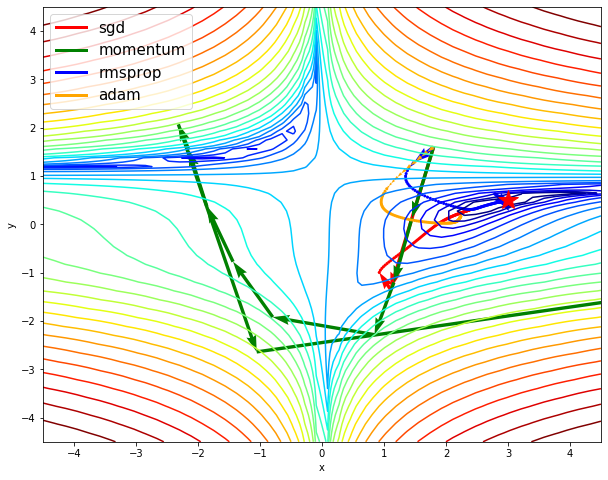

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.contour(x_mesh, y_mesh, z, levels=np.logspace(-0.5, 5, 25), norm=LogNorm(), cmap=plt.cm.jet)
ax.plot(*minima, 'r*', markersize=20)
colors = ['red', 'green', 'blue', 'orange', 'purple', 'magenta']
for name, path, color in zip(opt_names, all_pathes, colors):
  ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1],
            scale_units='xy', angles='xy', scale=1, color=color, lw=3)
  ax.plot([], [], color=color, label=name, lw=3)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_xlim((x_min, x_max))
ax.set_ylim((y_min, y_max))

ax.legend(loc='upper left', prop={'size': 15})

plt.savefig('allplot.png', dpi=150, quality=100)
plt.show()

### هي نظرة من فوق للشكل الثلاثي الابعاد حيث تمثل النجمة المينيموم

### Animiating contour plot with optimization path

In [12]:
class TrajectoryAnimation(animation.FuncAnimation):
  def __init__(self, *paths, labels=[], colors=[], fig=None, ax=None, frames=None, 
               interval=60, repeat_delay=5, blit=True, **kwargs):
    if fig is None:
      if ax is None:
        fig, ax = plt.subplots()
      else:
        fig = ax.get_figure()
    else:
      if ax is None:
        ax = fig.gca()

    self.fig = fig
    self.ax = ax

    self.paths = paths

    if frames is None:
      frames = max(path.shape[1] for path in paths)

    self.lines = [ax.plot([], [], label=label, color=color, lw=3)[0] 
                  for _, label, color in zip_longest(paths, labels, colors)]
    self.points = [ax.plot([], [], 'o', color=line.get_color())[0] 
                   for line in self.lines]

    super(TrajectoryAnimation, self).__init__(fig, self.animate, init_func=self.init_anim,
                                              frames=frames, interval=interval, blit=blit,
                                              repeat_delay=repeat_delay, **kwargs)

  def init_anim(self):
    for line, point in zip(self.lines, self.points):
      line.set_data([], [])
      point.set_data([], [])
    return self.lines + self.points

  def animate(self, i):
    for line, point, path in zip(self.lines, self.points, self.paths):
      line.set_data(*path[::,:i])
      point.set_data(*path[::,i-1:i])
    return self.lines + self.points

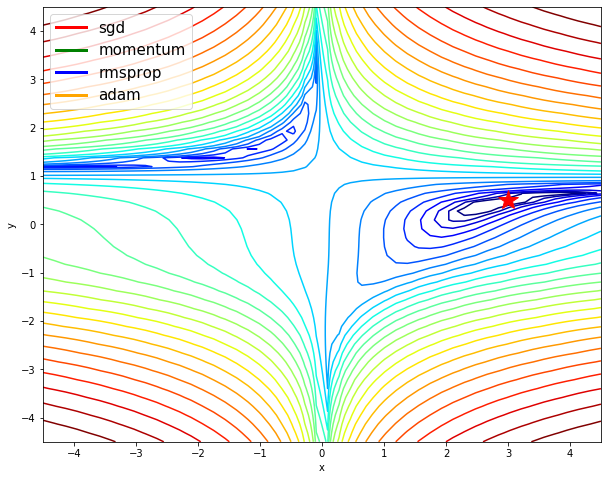

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.contour(x_mesh, y_mesh, z, levels=np.logspace(-0.5, 5, 25), norm=LogNorm(), cmap=plt.cm.jet)
ax.plot(*minima, 'r*', markersize=20)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_xlim((x_min, x_max))
ax.set_ylim((y_min, y_max))

path_animation = TrajectoryAnimation(*all_pathes, labels=opt_names, colors=colors, ax=ax)

ax.legend(loc='upper left', prop={'size': 15})

In [14]:
HTML(path_animation.to_html5_video())

#### Gradient mit Momentum springt extreme auf die anderen Seite-> Gradient ist relative hoch deswegen springt sofort weg von dem Punkt, wo vorher war,

#### stochastic gradient descent ist schneller als ADAM!

#### RMSprop hat ein Problem, dass er immer zwischen 2 lokalen Minima springt! ( insbesonders bei langem Training)

## wer ist schneller? 
## 1- RMSprop 
## 2- ADAM
